In [25]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# For data refer: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [28]:
# Filtering cats (class 3) and dogs (class 5)
train_filter = np.where((train_labels == 3) | (train_labels == 5))[0]
test_filter = np.where((test_labels == 3) | (test_labels == 5))[0]

train_images, train_labels = train_images[train_filter], train_labels[train_filter]
test_images, test_labels = test_images[test_filter], test_labels[test_filter]

# Converting the labels to binary (0 for cats, 1 for dogs)
train_labels = np.where(train_labels == 3, 0, 1)
test_labels = np.where(test_labels == 3, 0, 1)

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape


((0, 32, 32, 3), (0, 1), (0, 32, 32, 3), (0, 1))

In [29]:
# Normalizing
train_images, test_images = train_images / 255.0, test_images / 255.0

In [30]:
# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
])

In [32]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.shuffle(1000).batch(32).map(lambda x, y: (data_augmentation(x, training=True), y))

test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(32)

In [34]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [35]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(train_ds, epochs=21, validation_data=test_ds)

Epoch 1/21
313/313 [==============================] - 18s 57ms/step - loss: 0.5178 - accuracy: 0.7433 - val_loss: 0.5102 - val_accuracy: 0.7485
Epoch 2/21
313/313 [==============================] - 17s 54ms/step - loss: 0.5082 - accuracy: 0.7516 - val_loss: 0.5036 - val_accuracy: 0.7545
Epoch 3/21
313/313 [==============================] - 19s 60ms/step - loss: 0.4932 - accuracy: 0.7572 - val_loss: 0.4891 - val_accuracy: 0.7650
Epoch 4/21
313/313 [==============================] - 17s 54ms/step - loss: 0.4951 - accuracy: 0.7551 - val_loss: 0.4583 - val_accuracy: 0.7775
Epoch 5/21
313/313 [==============================] - 17s 54ms/step - loss: 0.4821 - accuracy: 0.7668 - val_loss: 0.4727 - val_accuracy: 0.7785
Epoch 6/21
313/313 [==============================] - 17s 55ms/step - loss: 0.4768 - accuracy: 0.7703 - val_loss: 0.4558 - val_accuracy: 0.7925
Epoch 7/21
313/313 [==============================] - 17s 54ms/step - loss: 0.4717 - accuracy: 0.7712 - val_loss: 0.4592 - val_accuracy:

## Evaluating the model

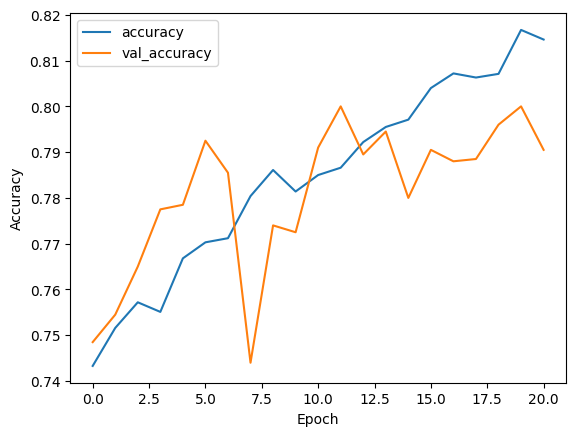

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

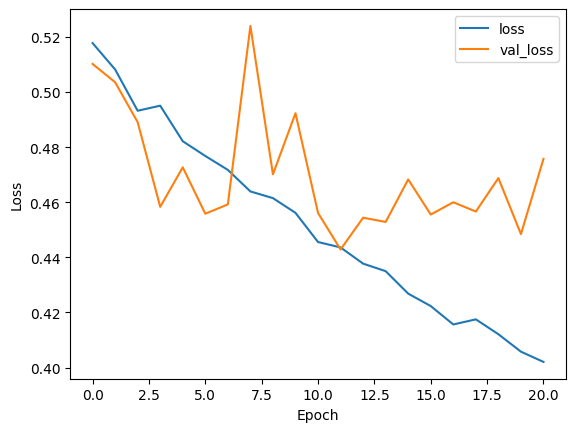

In [9]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
import cv2

def preprocess_and_predict(image_path, model):
    image = cv2.imread(image_path)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    resized_image = cv2.resize(image, (32, 32))

    normalized_image = resized_image / 255.0

    image_input = np.expand_dims(normalized_image, axis=0)

    prediction = model.predict(image_input)

    predicted_class = "Dog" if prediction[0][0] > 0.5 else "Cat"
    return predicted_class

# List of paths to the images
image_paths = [
    '/content/test_img_1.jpg',
    '/content/test_img_2.jpg',
    '/content/test_img_3.jpg',
    '/content/test_img_4.jpg',
    '/content/test_img_5.jpg',
    '/content/test_img_6.jpg',
    '/content/test_img_7.jpg',
    '/content/test_img_8.jpg',
]

# Looping through the image paths and predicting each one
for image_path in image_paths:
    prediction = preprocess_and_predict(image_path, model)
    print(f"The model predicts {image_path} as: {prediction}")


1/1 [==============================] - 0s 22ms/step
The model predicts /content/test_img_1.jpg as: Cat
1/1 [==============================] - 0s 24ms/step
The model predicts /content/test_img_2.jpg as: Dog
1/1 [==============================] - 0s 21ms/step
The model predicts /content/test_img_3.jpg as: Dog
1/1 [==============================] - 0s 25ms/step
The model predicts /content/test_img_4.jpg as: Dog
1/1 [==============================] - 0s 23ms/step
The model predicts /content/test_img_5.jpg as: Cat
1/1 [==============================] - 0s 24ms/step
The model predicts /content/test_img_6.jpg as: Cat
1/1 [==============================] - 0s 24ms/step
The model predicts /content/test_img_7.jpg as: Cat
1/1 [==============================] - 0s 25ms/step
The model predicts /content/test_img_8.jpg as: Dog


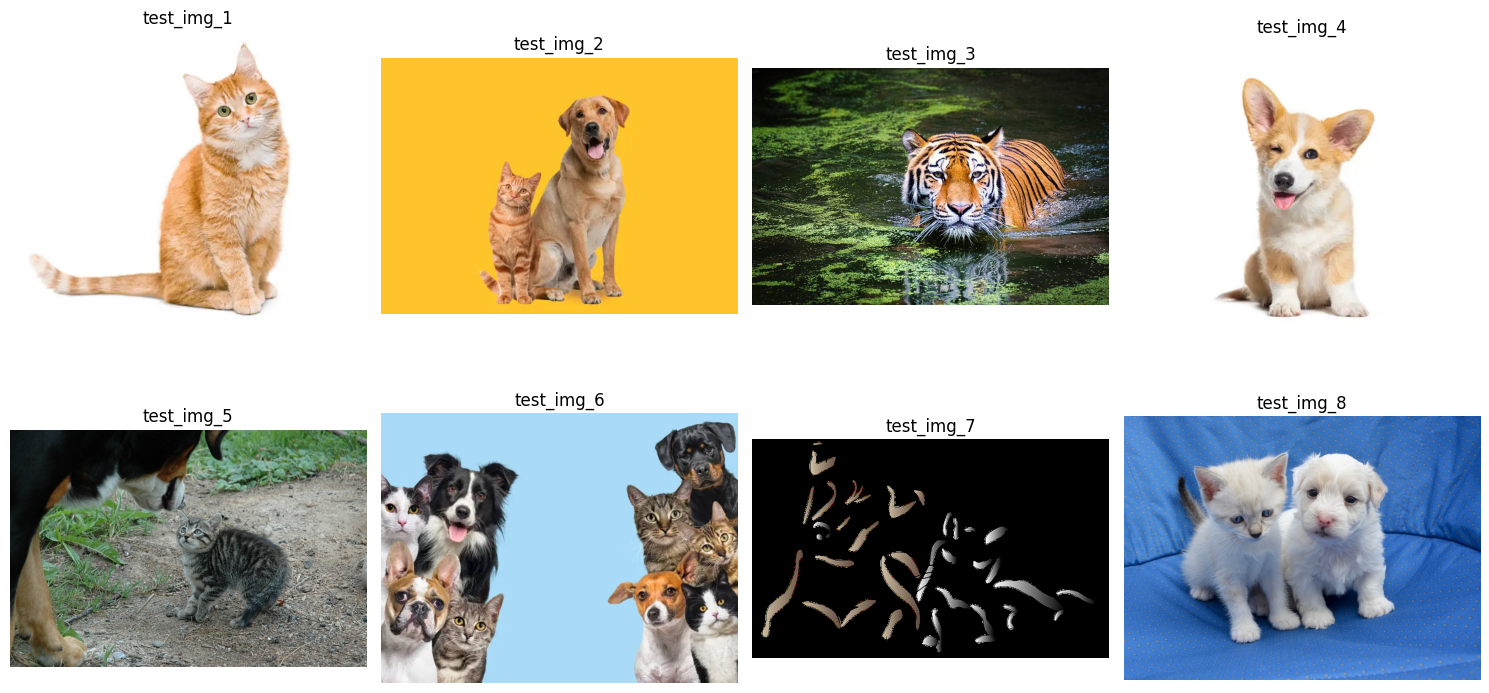

In [24]:
import cv2
import matplotlib.pyplot as plt

image_paths = [
    '/content/test_img_1.jpg',
    '/content/test_img_2.jpg',
    '/content/test_img_3.jpg',
    '/content/test_img_4.jpg',
    '/content/test_img_5.jpg',
    '/content/test_img_6.jpg',
    '/content/test_img_7.jpg',
    '/content/test_img_8.jpg',
]

# Image names
image_names = [
    'test_img_1',
    'test_img_2',
    'test_img_3',
    'test_img_4',
    'test_img_5',
    'test_img_6',
    'test_img_7',
    'test_img_8',

]

fig, axes = plt.subplots(2, 4, figsize=(15, 8))

for i, ax in enumerate(axes.flatten()):

    image = cv2.imread(image_paths[i])

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    ax.imshow(image)

    ax.set_title(image_names[i])

    ax.axis('off')

plt.tight_layout()
plt.show()


For Evaluation, I intentionally provided the model with challenging and unexpected test images to assess its performance. Here are the observations based on the test images:

Test images 2 and 5 contain both cats and dogs together in a single image. The model seemed to predict the pet that appeared larger in size or was more in focus in such cases.

Humorously Test image 3, is a "Big Cat" and you can see the result.

Test image 6 includes multiple cats (5) and dogs (4) in a group. The model's ability to correctly identify each pet in such a complex scenario was under scrutiny.

Test image 7 is a mere sketch, and at first look, even for humans, it could be challenging to distinguish the actual pet in the image.

Test image 8 showcases white pets with similar appearances. The model was put to the test to differentiate between such visually similar pets.

In summary, my main aim was to challenge the model with tough predictions and assess its robustness in handling various complex scenarios.